-   Tyler Arista, tja9@calvin.edu

# Instructions for today's practice

- Create a copy of this Jupyter Notebook and share it with your partner.
- Fill student names and e-mails in the text cell above.
- At the end of the practice, download the .ipynb file and upload it on Moodle.

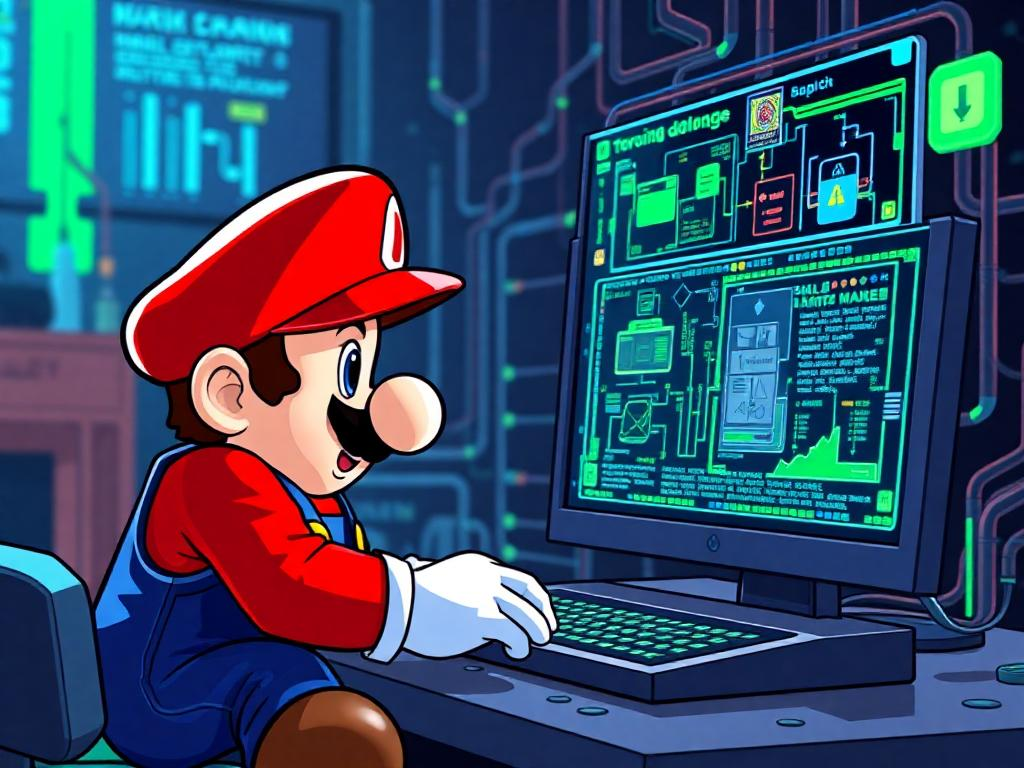

# Dataset: videogame development

This fictional dataset provides detailed information about various characteristics related to the development and design of video games.

#### **Columns:**

1. **Game Title** (`string`): The name of the video game (e.g., *Galactic Quest*, *Puzzle Master*).

2. **Genre** (`string`): The genre of the video game (e.g., Sci-Fi RPG, Puzzle, Racing).

3. **Development Time (months)** (`integer`): The total number of months spent developing the game.

4. **Team Size** (`integer`): The number of people in the development team.

5. **Art Style** (`string`): The style of the game’s visual presentation, such as 2D or 3D.

6. **Game Length (hours)** (`integer`): The estimated total length of gameplay in hours.

7. **Graphics Complexity (1-10)** (`integer`): A score representing the complexity of the game’s graphics, on a scale from 1 (simple) to 10 (very complex).

8. **Soundtrack Type** (`string`): The type of music or sound used in the game (e.g., Orchestral, Electronic, Rock, Ambient).

9. **Open World (0/1)** (`binary`): A binary variable indicating whether the game has an open world environment (1 = Yes, 0 = No).

10. **Multiplayer (0/1)** (`binary`): A binary variable indicating whether the game includes multiplayer features (1 = Yes, 0 = No).

In [5]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://cs.calvin.edu/courses/data/202/fsantos/datasets/videogame.csv')
df.head()

,Game Title,Genre,Development Time (months),Team Size,Art Style,Game Length (hours),Graphics Complexity (1-10),Soundtrack Type,Open World (0/1),Multiplayer (0/1)
0,Space Explorers,Sci-Fi,33,80,2D,55,3,Ambient,1,0
1,Fantasy Kingdom,Platformer,20,20,3D,85,5,Rock,0,0
2,Flight Frenzy,Sci-Fi,58,94,3D,137,5,Rock,1,0
3,Desert Riders,Sci-Fi RPG,17,94,2D,33,5,Rock,1,1
4,Cyber Chase,Fantasy RPG,45,52,3D,136,3,Orchestral,0,1


**📝 Exercise 1**: Let's use a **linear regression** for predicting `Development Time (months)` given the features `Team Size`, `Game Length (hours)`, and `Graphics Complexity`

- Separate target and features.
- For this time, don't use a scaler in our features.
- Split the dataset in train and test datasets.
- Train the model with the train dataset.
- Show the model's **coefficients** ($b_1, ..., b_n$) and intercept ($b_0$).
- Evaluate it by calculating the Mean Absolute Error (MAE)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Seperate target & features
X = df[['Team Size', 'Game Length (hours)', 'Graphics Complexity (1-10)']]
y = df['Development Time (months)']

# Split the dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model with the train dataset
model = LinearRegression()
model.fit(X_train, y_train)

# Get model's coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Make predictions and calculate the Mean Absolute Error (MAE)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

# Show the model's coefficients & Intercept
print("Coefficients (𝑏1, 𝑏2, 𝑏3):", coefficients)
print("Intercept (𝑏0):", intercept)

# Evaluate it by calculating the MAE
print("Mean Absolute Error (MAE):", mae)

Coefficients (𝑏1, 𝑏2, 𝑏3): [-0.02350568 -0.00837141  0.05749794]
Intercept (𝑏0): 37.98214675350332
Mean Absolute Error (MAE): 11.977877028786292


**📝 Exercise 2**: Now, perform the same operation, but use the `StandardScaler` in our features. You may use pipelines if you want (no need).
- Now, show the model's **coefficients** ($b_1, ..., b_n$) and intercept ($b_0$).
- Answer: given these coefficients, which features are the most important in this prediction? Do you think it makes sense or not?

In [10]:
from sklearn.preprocessing import StandardScaler

X = df[['Team Size', 'Game Length (hours)', 'Graphics Complexity (1-10)']]
y = df['Development Time (months)']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

coefficients = model.coef_
intercept = model.intercept_

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("Coefficients (𝑏1, 𝑏2, 𝑏3):", coefficients)
print("Intercept (𝑏0):", intercept)
print("Mean Absolute Error (MAE):", mae)

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': abs(coefficients)})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Coefficients (𝑏1, 𝑏2, 𝑏3): [-0.65483251 -0.35826837  0.16535032]
Intercept (𝑏0): 36.46804903707088
Mean Absolute Error (MAE): 11.977877028786294

Feature Importance:
                      Feature  Importance
0                   Team Size    0.654833
1         Game Length (hours)    0.358268
2  Graphics Complexity (1-10)    0.165350


Exercise 2 Response: The most important feature in predicting development time is Team Size, as it has the largest impact in reducing it. Game Length also decreases development time but to a lesser extent, while Graphics Complexity slightly increases it. This makes sense, as having a larger team speeds up development, and more complex graphics generally require more work.

**📝 Exercise 3**: Now, apply these evaluation metrics to our regression:
- Mean Absolute Error
- Mean Squared Error
- Root Mean Squared Error
- $R^2$ score

How are these numbers different and what do they mean in our context?

In [11]:
from sklearn.metrics import mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Mean Absolute Error (MAE): 11.977877028786294
Mean Squared Error (MSE): 205.62660797861312
Root Mean Squared Error (RMSE): 14.339686467235367
R² Score: -0.00823304026091587


The Mean Absolute Error (MAE) of 11.978 means that, on average, the model’s predictions are off by 11.978 months when estimating development time. The Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are higher because they penalize larger errors more, showing that some predictions are much further off than others. The R² score is negative, meaning the model doesn't explain the variation in development time well and performs worse than simply guessing the average development time for all games.

**📝 Exercise 4**: Is it still possible to obtain better predictions?

We can try to check all possible combinations of features.

First, let's set our features:

In [12]:
# Define your features and target variable
features = ['Team Size', 'Art Style', 'Game Length (hours)', 'Graphics Complexity (1-10)', 'Soundtrack Type', 'Open World (0/1)', 'Multiplayer (0/1)']
target = 'Development Time (months)'

Now, take a look and complete this code:

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from itertools import combinations

# Store results
results = []

# Generate all combinations of features
for r in range(1, len(features) + 1):
    for combo in combinations(features, r):

        # Select the columns for the current combination
        X = df[list(combo)]
        y = df[target]

        # One-Hot Encoding some categorical columns (that's a different way of doing it than we learned)
        if 'Art Style' in combo:
          X = pd.get_dummies(X, columns=['Art Style'], drop_first=True)
        if 'Soundtrack Type' in combo:
          X = pd.get_dummies(X, columns=['Soundtrack Type'], drop_first=True)

        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Fit the linear regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Make predictions and calculate R-squared score
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)

        # Store the results (combination of features and R-squared score)
        results.append({'Features': combo, 'R-squared': r2})

# Convert results to DataFrame and sort by R-squared
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='R-squared', ascending=False)

# Display the top results
print(results_df.head())

                                             Features  R-squared
20            (Game Length (hours), Open World (0/1))  -0.001388
2                              (Game Length (hours),)  -0.001411
54  (Game Length (hours), Graphics Complexity (1-1...  -0.003473
18  (Game Length (hours), Graphics Complexity (1-10))  -0.003487
5                                 (Open World (0/1),)  -0.004631


Observe the resulting results and answer: which is the best performing set of features?

The best-performing set of features is the combination that appears at the top of the results dataframe with the highest R² score. This combination explains the most variation in development time among the features tested. If the R² is still low, it indicates that even the best combination of these features does not capture the development time well, suggesting that other variables might be needed.

**📝 Exercise 5**: Now, we will use a **logistic regression** to predict if a game is `Open World (0/1)` given the features `Genre`, `Game Length (hours)`, `Graphics Complexity`, `Development Time (months)`.

- We have to encode `Genre`. Should we Label Encode or use One-Hot Encoding?
- Use a scaler for other numerical features.
- A pipeline may come in handy now!
- Split the dataset in train and test datasets.
- Train the model with the train dataset.
- Show the model's **coefficients** ($w_1, ..., w_n$) and intercept ($w_0$).
- Show the model's predicted targets (`predict`) and the associated probabilities (`predict_proba`) for the test dataset.

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

X = df[['Genre', 'Game Length (hours)', 'Graphics Complexity (1-10)', 'Development Time (months)']]
y = df['Open World (0/1)']

categorical_features = ['Genre']
numerical_features = ['Game Length (hours)', 'Graphics Complexity (1-10)', 'Development Time (months)']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=500))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

model = pipeline.named_steps['classifier']
coefficients = model.coef_[0]
intercept = model.intercept_[0]

y_pred = pipeline.predict(X_test)
y_proba = pipeline.predict_proba(X_test)

print("Coefficients (𝑤1,...,𝑤𝑛):", coefficients)
print("Intercept (𝑤0):", intercept)
print("\nPredicted Targets:", y_pred[:10])
print("\nPredicted Probabilities:\n", y_proba[:10])

Coefficients (𝑤1,...,𝑤𝑛): [ 0.05677308 -0.02163486  0.04731501 -0.17562721 -0.58441835  0.04548222
 -0.0453778   0.44252379  0.20823254  0.17029835]
Intercept (𝑤0): -0.21742858178714813

Predicted Targets: [0 0 0 1 0 0 0 0 0 0]

Predicted Probabilities:
 [[0.60476908 0.39523092]
 [0.50025689 0.49974311]
 [0.54966803 0.45033197]
 [0.46824519 0.53175481]
 [0.73244216 0.26755784]
 [0.67124574 0.32875426]
 [0.54589882 0.45410118]
 [0.61370391 0.38629609]
 [0.50931552 0.49068448]
 [0.5542593  0.4457407 ]]


**📝 Exercise 6**: Calculate the **odds-ratio** of each coefficient. Which coefficients are the most important for our prediction?


In [15]:
odds_ratios = np.exp(coefficients)

encoded_feature_names = (
    pipeline.named_steps['preprocessor']
    .named_transformers_['cat']
    .get_feature_names_out(categorical_features)
)
feature_names = numerical_features + list(encoded_feature_names)

odds_ratio_df = pd.DataFrame({
    'Feature': feature_names,
    'Odds Ratio': odds_ratios
})

odds_ratio_df = odds_ratio_df.sort_values(by='Odds Ratio', ascending=False)

print("Odds-Ratio of each coefficient:")
print(odds_ratio_df)


Odds-Ratio of each coefficient:
                      Feature  Odds Ratio
7                Genre_Sci-Fi    1.556631
8            Genre_Sci-Fi RPG    1.231500
9               Genre_Shooter    1.185659
0         Game Length (hours)    1.058416
2   Development Time (months)    1.048452
5                Genre_Puzzle    1.046532
1  Graphics Complexity (1-10)    0.978597
6                Genre_Racing    0.955636
3           Genre_Fantasy RPG    0.838931
4            Genre_Platformer    0.557430


The most important coefficients for predicting whether a game is open-world are Genre_Sci-Fi and Genre_Sci-Fi RPG, as they have the highest odds-ratios (1.556 and 1.231, respectively). This means that games in the Sci-Fi and Sci-Fi RPG genres are significantly more likely to be open-world compared to the baseline genre.

In contrast, Genre_Platformer has the lowest odds-ratio (0.557), indicating that platformer games are much less likely to be open-world. Among the numerical features, Game Length (hours) and Development Time (months) have odds-ratios slightly above 1, suggesting that longer game length and development time also increase the likelihood of a game being open-world, but to a lesser extent.

**📝 Exercise 7**: Use `confusion_matrix(y_test, y_pred)` and `classification_report(y_test, y_pred)` to print some evaluation metrics for our prediction.

**Is this model better on precision or in recall?** What does that mean in the context of our predictions?

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred)

class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[17  3]
 [14  6]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.85      0.67        20
           1       0.67      0.30      0.41        20

    accuracy                           0.57        40
   macro avg       0.61      0.57      0.54        40
weighted avg       0.61      0.57      0.54        40



The model is better at precision than recall, with a precision of 67% and a recall of 30%. This means it is more accurate when it predicts a game to be open-world, but it misses many actual open-world games. To identify more open-world games, the model would need to improve recall.

**📝 Reflection Exercise**: Write a sentence or two of your overall
reflections on this practice. You may write whatever you want, but you
might perhaps respond to one or two of these questions:

-   Was anything unclear about this assignment?
  - No there wasn't anythign unclear about this assignment. Breaking the notebook into exercises/sections made it easier to follow
-   How hard was it for you? Where did you get “stuck”?
  - Like previous assignments, it was a bit challenging, but it was a good opportunity to apply what we've leanred in class to an exercise
-   How long did it take you?
  - This assignment took me about 1-1.5 hours
-   What questions or uncertainties remain?
  - No, I don't have any remaining questions or uncertainities
-   What skills do you think you’ll need more practice with?
  - I think just more practice in general would be helpful to further apply & strengthen the skills we've learned
-   Did you try anything out of curiosity that you weren’t specifically
    asked to do?
      - No, I didn't try anything outside the assignment instructions this time